In [1]:
import torch
from diffusers import StableDiffusionXLPipeline, DPMSolverMultistepScheduler
from huggingface_hub import hf_hub_download
import matplotlib.pyplot as plt  # For displaying images

# Set device
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [2]:
import torch
torch.cuda.empty_cache()  # Frees unused VRAM
print(f"VRAM freed: {torch.cuda.memory_reserved() / 1024**3:.2f} GB reserved")

VRAM freed: 0.00 GB reserved


In [3]:
from huggingface_hub import login
login()

In [8]:
import os

save_directory = "./ssd-1b-model"

# Check if the model is already saved
if os.path.exists(save_directory):
    print(f"Loading model from {save_directory}")
    pipe = StableDiffusionXLPipeline.from_pretrained(
        save_directory,
        torch_dtype=torch.float16,  # For GPU efficiency
        use_safetensors=True
    )
else:
    print("Model not found locally, downloading and saving...")
    # Load the base SDXL model with optimized scheduler
    pipe = StableDiffusionXLPipeline.from_pretrained(
        "segmind/SSD-1B",
        torch_dtype=torch.float16,  # For GPU efficiency
        use_safetensors=True,
    )
    pipe.safety_checker = None # Disable safety checker if needed
    pipe.save_pretrained(save_directory, variant="fp16") # Added variant="fp16" when saving
    print(f"Model downloaded and saved to {save_directory}")

pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe.to(device)

Loading model from ./ssd-1b-model


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionXLPipeline {
  "_class_name": "StableDiffusionXLPipeline",
  "_diffusers_version": "0.35.2",
  "_name_or_path": "./ssd-1b-model",
  "feature_extractor": [
    null,
    null
  ],
  "force_zeros_for_empty_prompt": true,
  "image_encoder": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "DPMSolverMultistepScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

  0%|          | 0/25 [00:00<?, ?it/s]

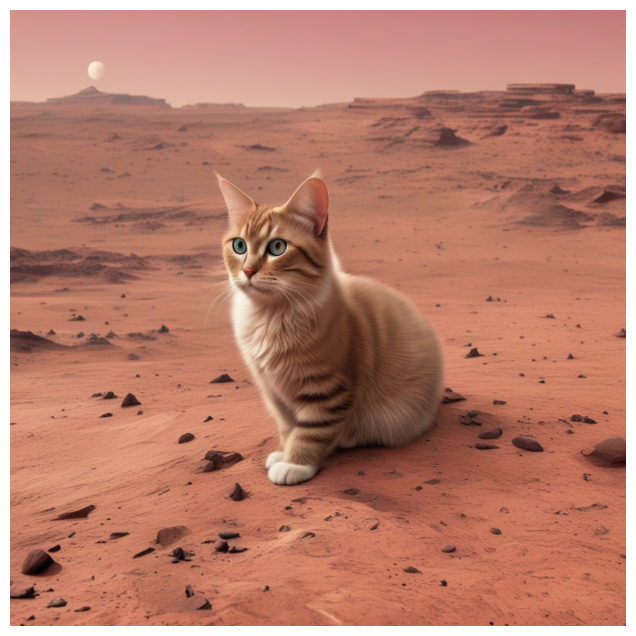

In [12]:
import torch

prompt = "cat on Mars"
# Add a seed for reproducible results
seed = 42
generator = torch.Generator(device=device).manual_seed(seed)

image = pipe(prompt, num_inference_steps=25, generator=generator).images[0]

# Display the image
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis("off")
plt.show()